In [1]:
# 0. Imports and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("C:/Users/Siddharth Sumaria/OneDrive/Desktop/Data Science/CloudThat Projects/8 week project/My project Dataset/12 month ecommerce dataset.csv")

In [5]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
185946,259354,iPhone,1,700.00,09-01-2019 16:00,"216 Dogwood St, San Francisco, CA 94016"
185947,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
185948,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [ ]:
# Correct parsing of Order Date with inferred format
df['Order Date'] = pd.to_datetime(df['Order Date'], infer_datetime_format=True)

# Or, if you know it’s in 'MM/DD/YY HH:MM' format:
# df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M')

# Now set other dtypes
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
df['Price Each']       = df['Price Each'].astype(float)

df['Month']    = df['Order Date'].dt.month.astype(int)
df['Week']     = df['Order Date'].dt.isocalendar().week.astype(int)
df['Day']      = df['Order Date'].dt.day.astype(int)
df['Hour']     = df['Order Date'].dt.hour.astype(int)
df['Weekday']  = df['Order Date'].dt.day_name().astype('category')

df['City']     = df['City'].astype('category')
df['State']    = df['State'].astype('category')
df['Category'] = df['Category'].astype('category')  # if defined
df['Group']    = df['Group'].astype('category')     # if defined


In [13]:
print(df.dtypes)

Order ID                     int64
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
City                      category
State                     category
Month                        int64
Week                         int64
Day                          int64
Hour                         int64
Weekday                   category
dtype: object


In [14]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,State,Month,Week,Day,Hour,Weekday
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas,TX,4,16,19,8,Friday
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston,MA,4,14,7,22,Sunday
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA,4,15,12,14,Friday
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA,4,15,12,14,Friday
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles,CA,4,18,30,9,Tuesday


Product
USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
Name: count, dtype: int64


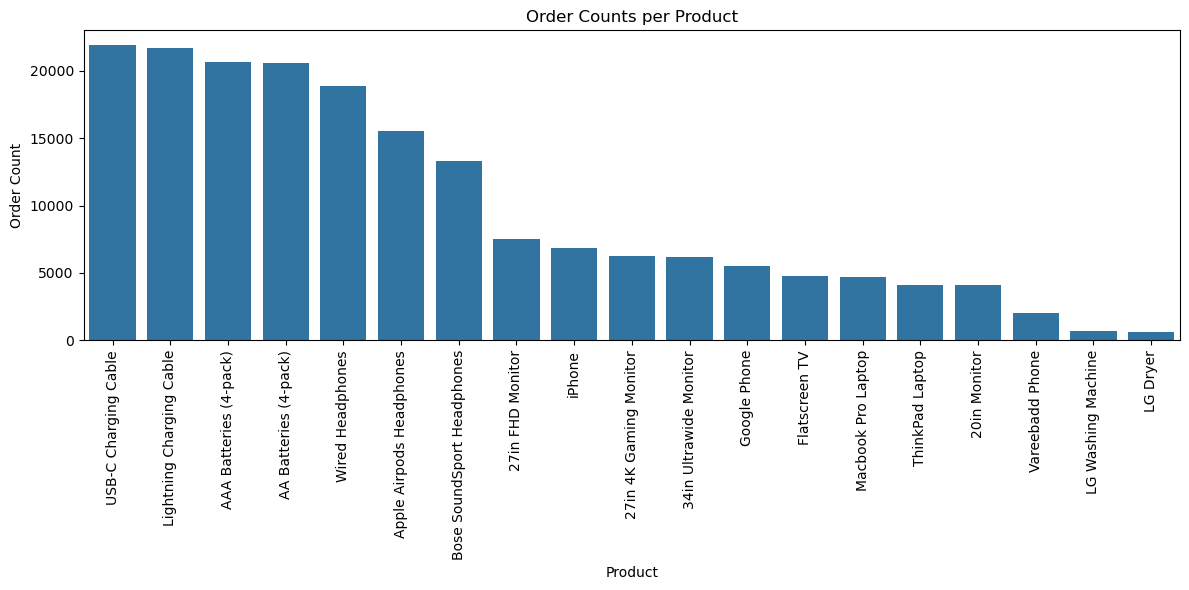

In [26]:

# 1. Product Count
product_counts = df['Product'].value_counts()
print(product_counts.head(10))
plt.figure(figsize=(12,6))
sns.barplot(x=product_counts.index, y=product_counts.values)
plt.xticks(rotation=90)
plt.title('Order Counts per Product')
plt.xlabel('Product')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()

Category
Other         71349
Headphones    47756
Cable         43561
Phone         14432
Laptop         8852
Name: count, dtype: int64


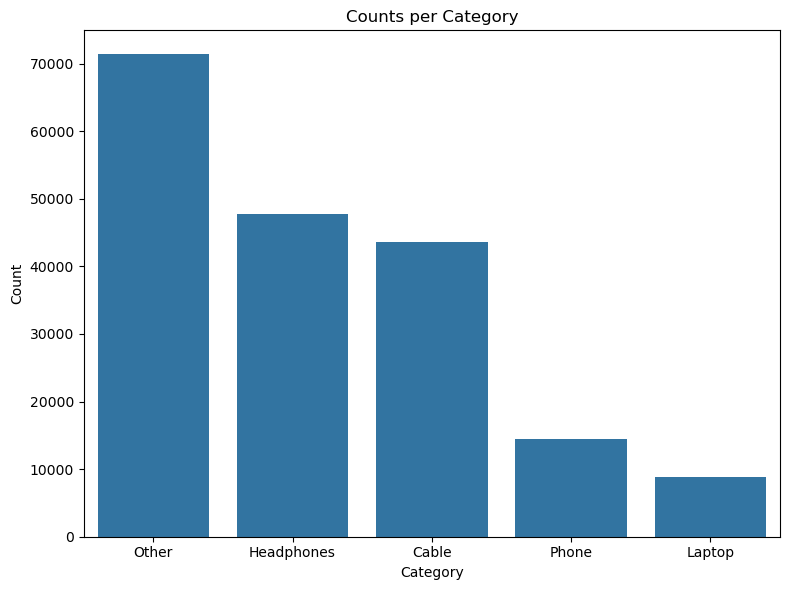

In [16]:
# 2. Product Type
def categorize(p):
    if 'Cable' in p:       return 'Cable'
    elif 'Phone' in p:      return 'Phone'
    elif 'Headphone' in p:  return 'Headphones'
    elif 'Laptop' in p:     return 'Laptop'
    elif 'Battery' in p:    return 'Battery'
    else:                   return 'Other'

df['Category'] = df['Product'].apply(categorize)
category_counts = df['Category'].value_counts()
print(category_counts)
plt.figure(figsize=(8,6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Counts per Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

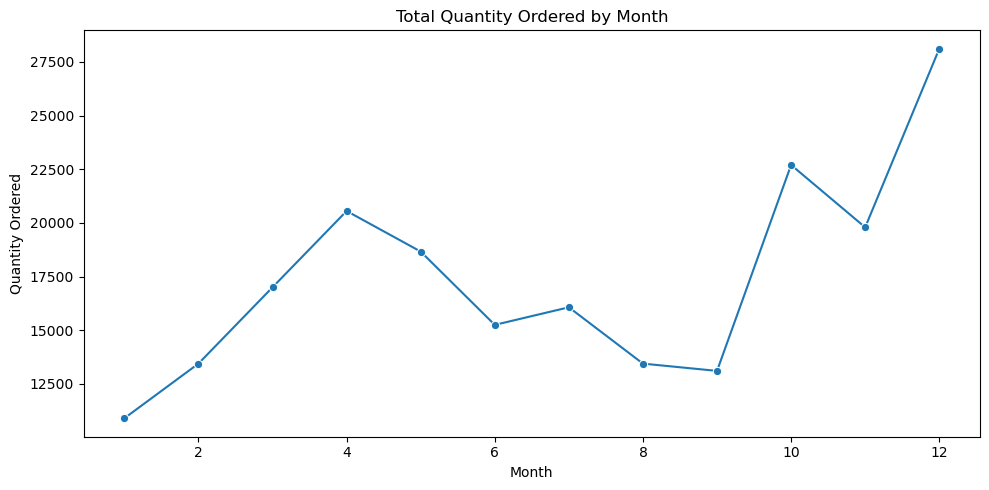

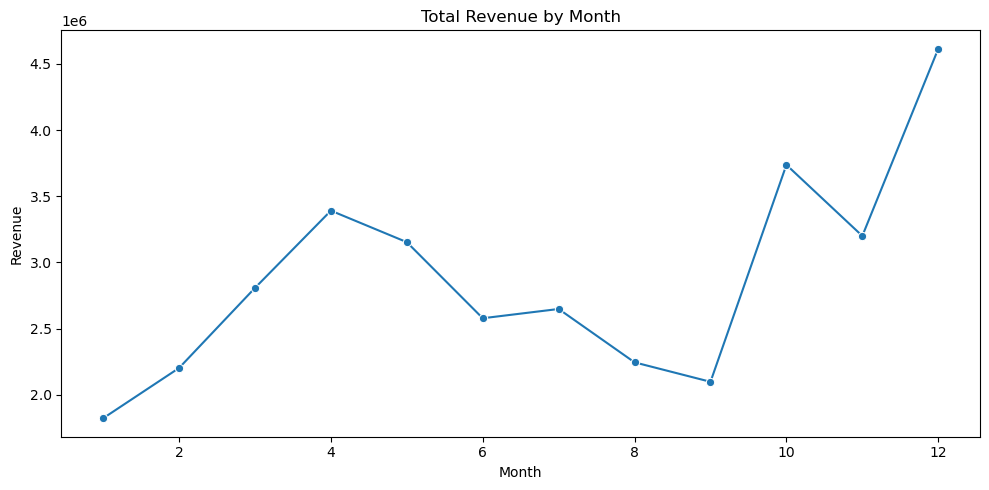

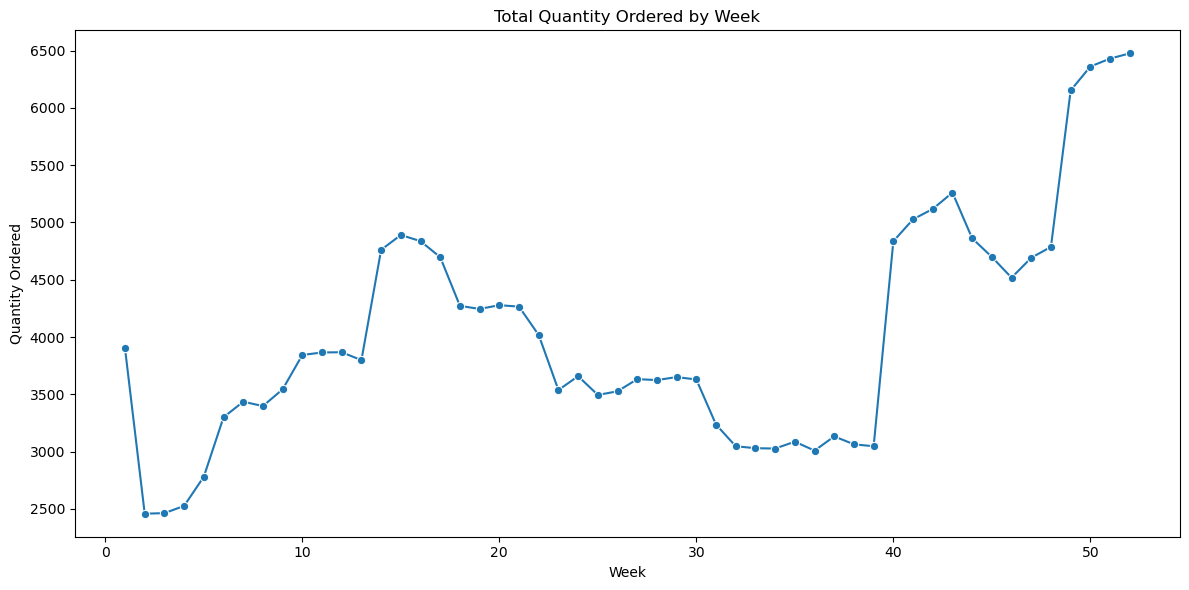

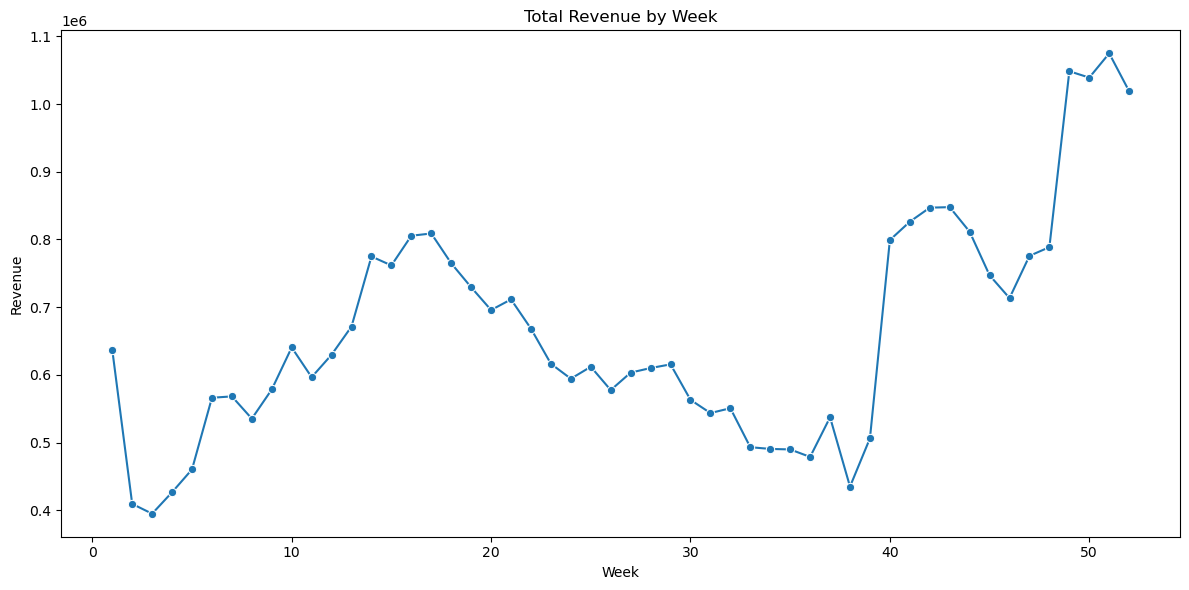

In [17]:
# 3. Seasonality: Monthly & Weekly Trends
df['Revenue'] = df['Quantity Ordered'] * df['Price Each']

monthly = df.groupby('Month').agg({
    'Quantity Ordered':'sum',
    'Revenue':'sum'
}).reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly, x='Month', y='Quantity Ordered', marker='o')
plt.title('Total Quantity Ordered by Month')
plt.xlabel('Month')
plt.ylabel('Quantity Ordered')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly, x='Month', y='Revenue', marker='o')
plt.title('Total Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

weekly = df.groupby('Week').agg({
    'Quantity Ordered':'sum',
    'Revenue':'sum'
}).reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=weekly, x='Week', y='Quantity Ordered', marker='o')
plt.title('Total Quantity Ordered by Week')
plt.xlabel('Week')
plt.ylabel('Quantity Ordered')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.lineplot(data=weekly, x='Week', y='Revenue', marker='o')
plt.title('Total Revenue by Week')
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

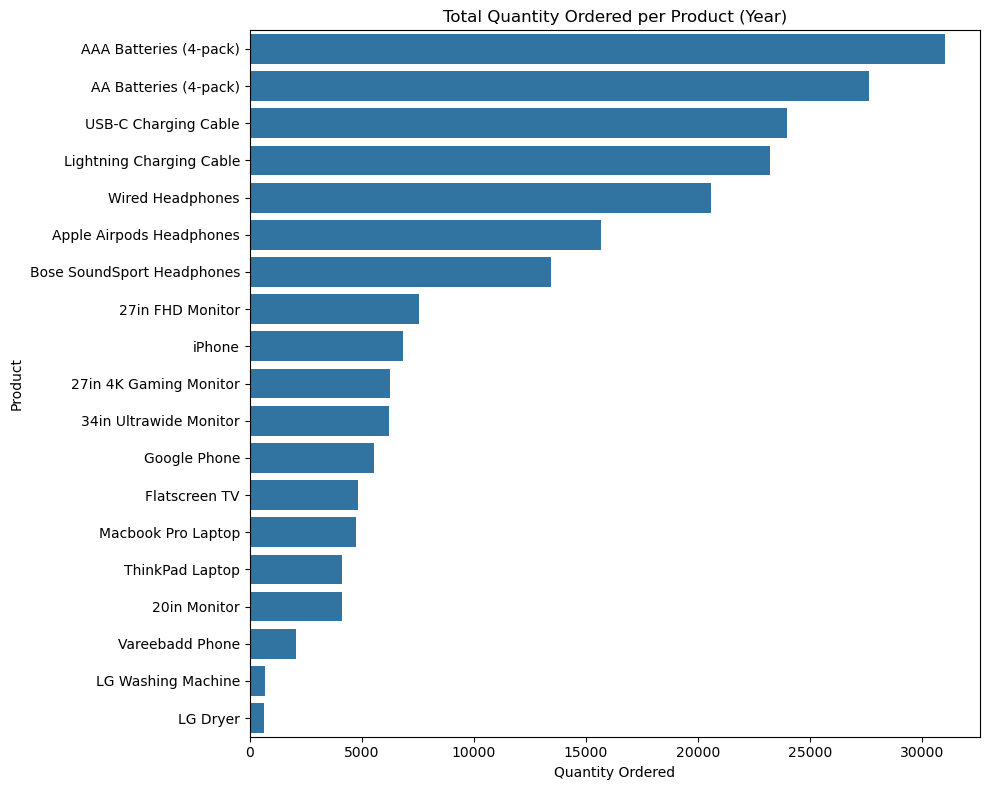

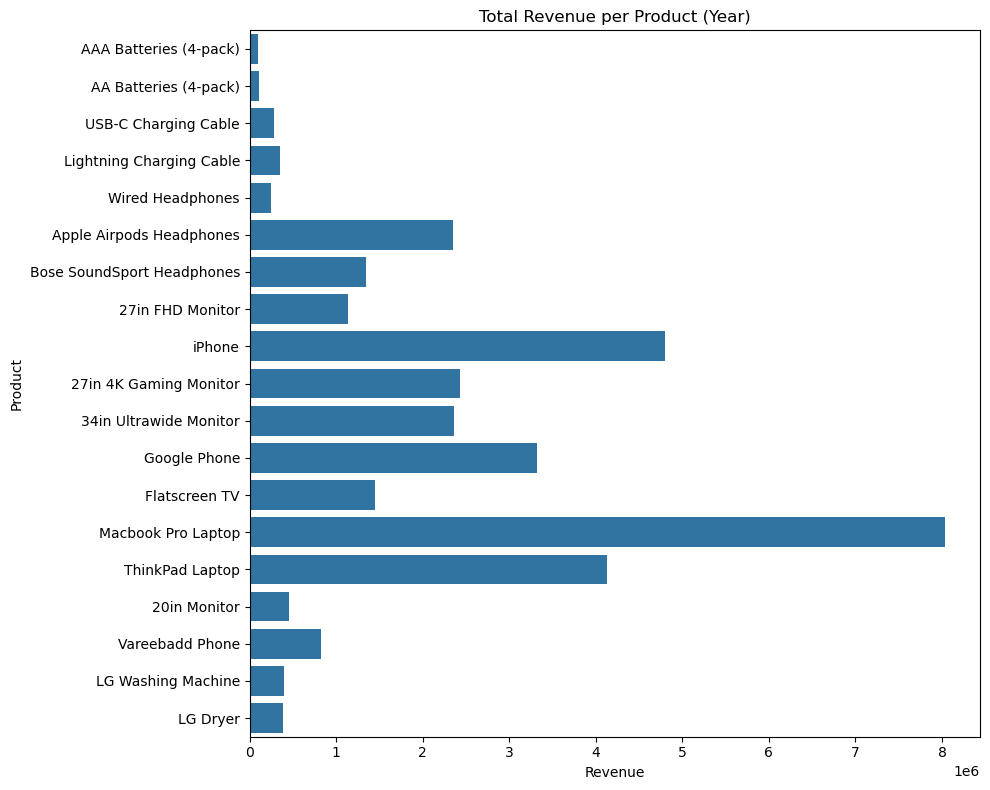

In [18]:
# 4. Aggregate 1-Year Distribution per Product
yearly = df.groupby('Product').agg({
    'Quantity Ordered':'sum',
    'Revenue':'sum'
}).sort_values('Quantity Ordered', ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(x=yearly['Quantity Ordered'], y=yearly.index)
plt.title('Total Quantity Ordered per Product (Year)')
plt.xlabel('Quantity Ordered')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,8))
sns.barplot(x=yearly['Revenue'], y=yearly.index)
plt.title('Total Revenue per Product (Year)')
plt.xlabel('Revenue')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

             Quantity Ordered      Revenue
Group                                     
Accessories             96867   4574789.26
Electronics             23307  21108258.70
Other                   88905   8808988.01


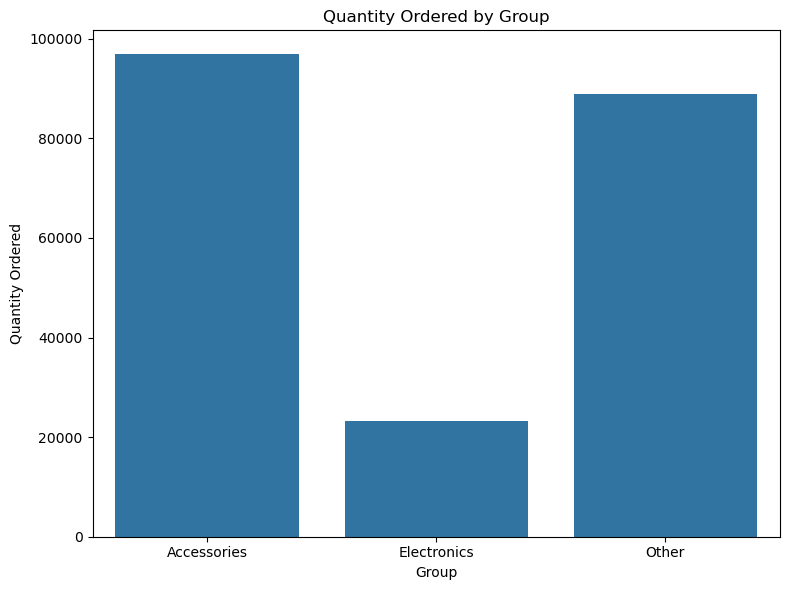

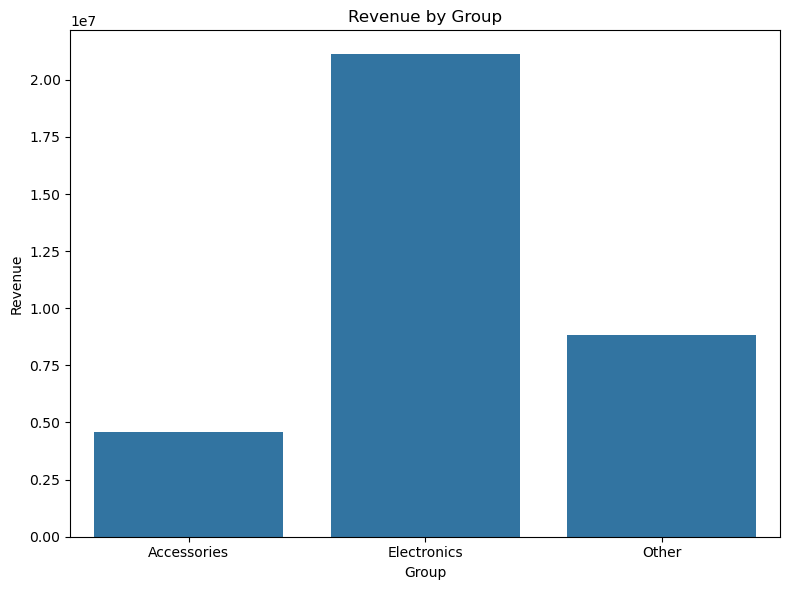

In [19]:
# 5. Product Group Analysis
electronics  = ['Phone', 'Laptop']
accessories  = ['Cable', 'Headphones', 'Battery']

def group_type(cat):
    if cat in electronics:    return 'Electronics'
    elif cat in accessories:  return 'Accessories'
    else:                      return 'Other'

df['Group'] = df['Category'].apply(group_type)
group_summary = df.groupby('Group').agg({
    'Quantity Ordered':'sum',
    'Revenue':'sum'
})

print(group_summary)
plt.figure(figsize=(8,6))
sns.barplot(x=group_summary.index, y=group_summary['Quantity Ordered'])
plt.title('Quantity Ordered by Group')
plt.xlabel('Group')
plt.ylabel('Quantity Ordered')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
sns.barplot(x=group_summary.index, y=group_summary['Revenue'])
plt.title('Revenue by Group')
plt.xlabel('Group')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

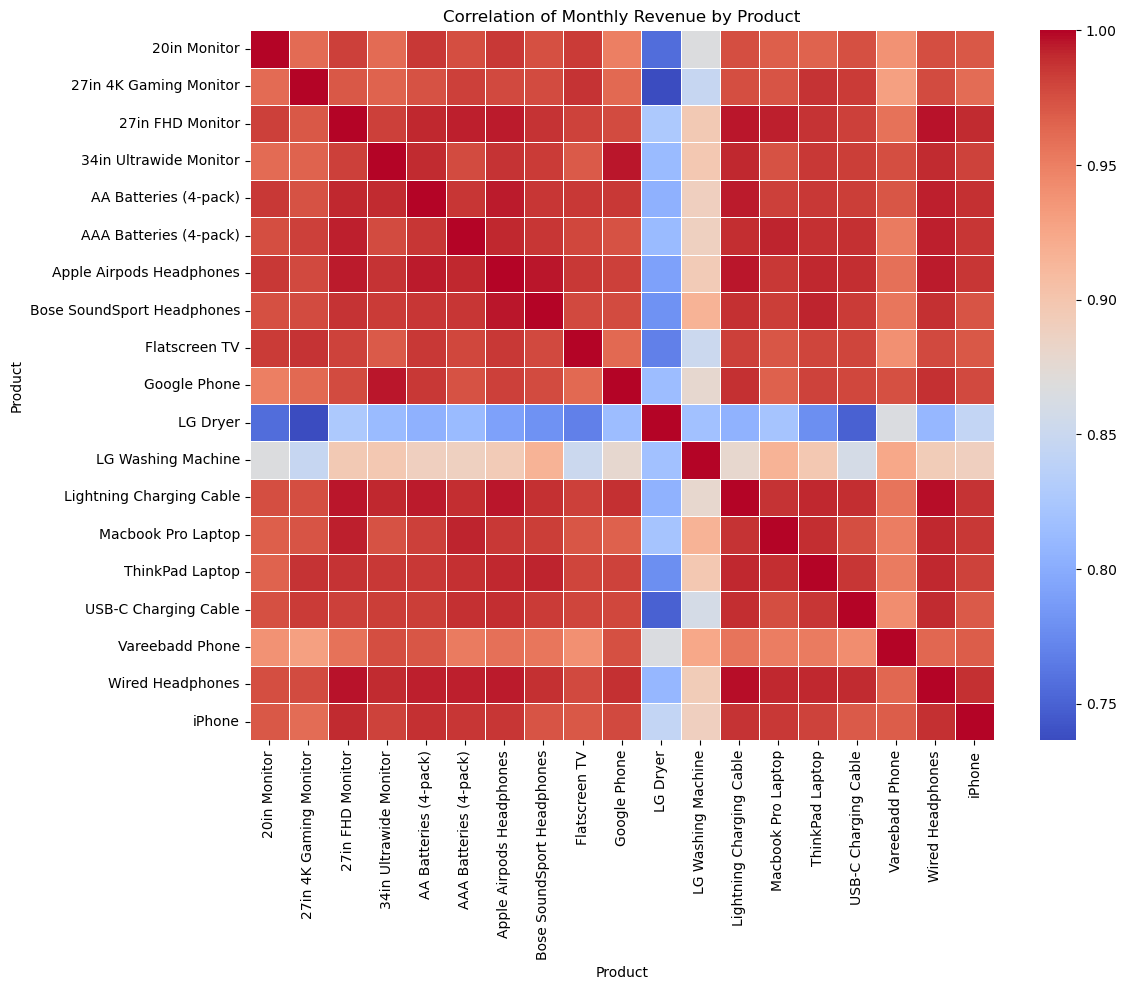

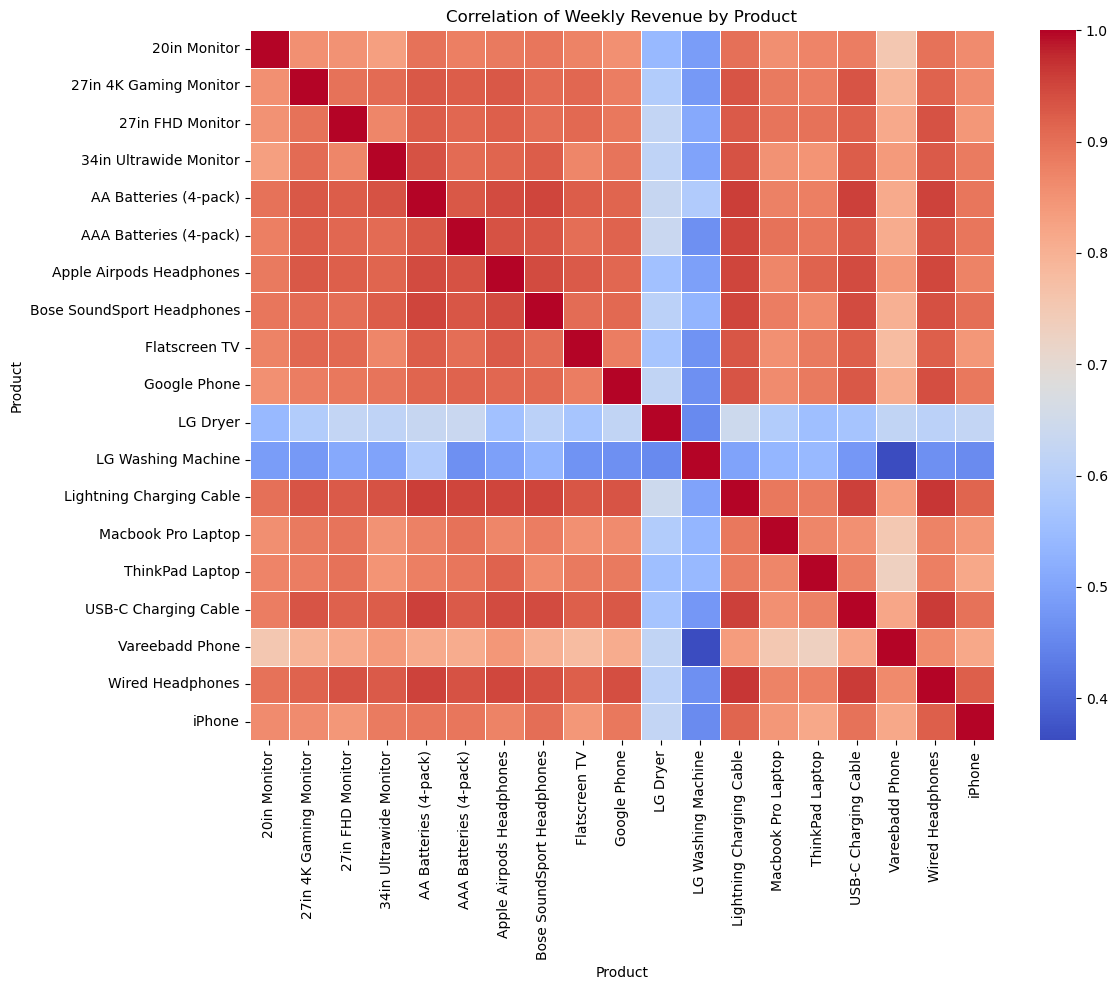

In [20]:
# 6. Product Correlation
monthly_pivot = df.pivot_table(
    index='Month', columns='Product', values='Revenue', aggfunc='sum'
)
corr_monthly = monthly_pivot.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_monthly, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation of Monthly Revenue by Product')
plt.tight_layout()
plt.show()

weekly_pivot = df.pivot_table(
    index='Week', columns='Product', values='Revenue', aggfunc='sum'
)
corr_weekly = weekly_pivot.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_weekly, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation of Weekly Revenue by Product')
plt.tight_layout()
plt.show()


=== Monthly Revenue Correlation Matrix ===
Product                     20in Monitor  27in 4K Gaming Monitor  \
Product                                                            
20in Monitor                        1.00                    0.96   
27in 4K Gaming Monitor              0.96                    1.00   
27in FHD Monitor                    0.98                    0.97   
34in Ultrawide Monitor              0.96                    0.97   
AA Batteries (4-pack)               0.99                    0.97   
AAA Batteries (4-pack)              0.98                    0.98   
Apple Airpods Headphones            0.99                    0.98   
Bose SoundSport Headphones          0.97                    0.98   
Flatscreen TV                       0.98                    0.99   
Google Phone                        0.95                    0.96   
LG Dryer                            0.76                    0.74   
LG Washing Machine                  0.87                    0.85   
Light

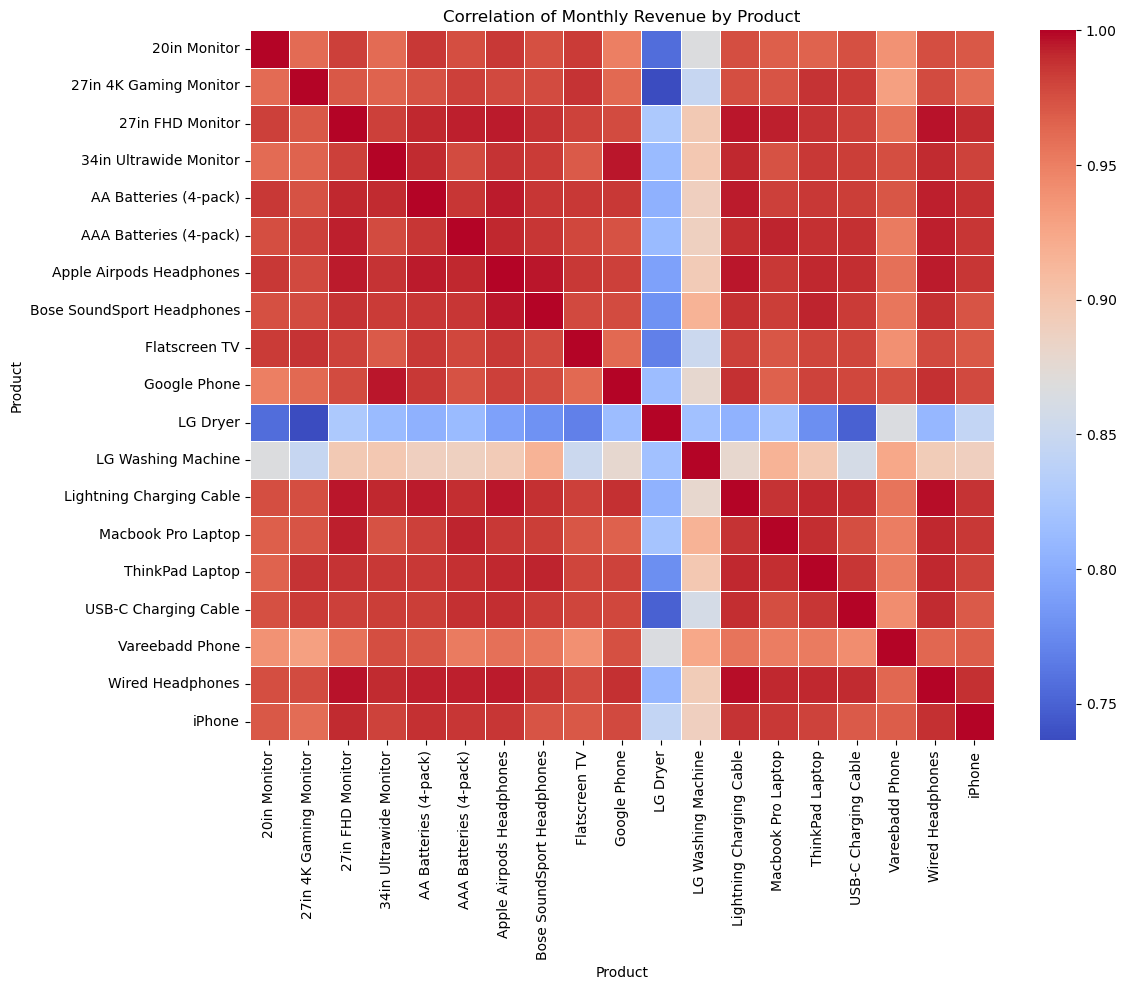

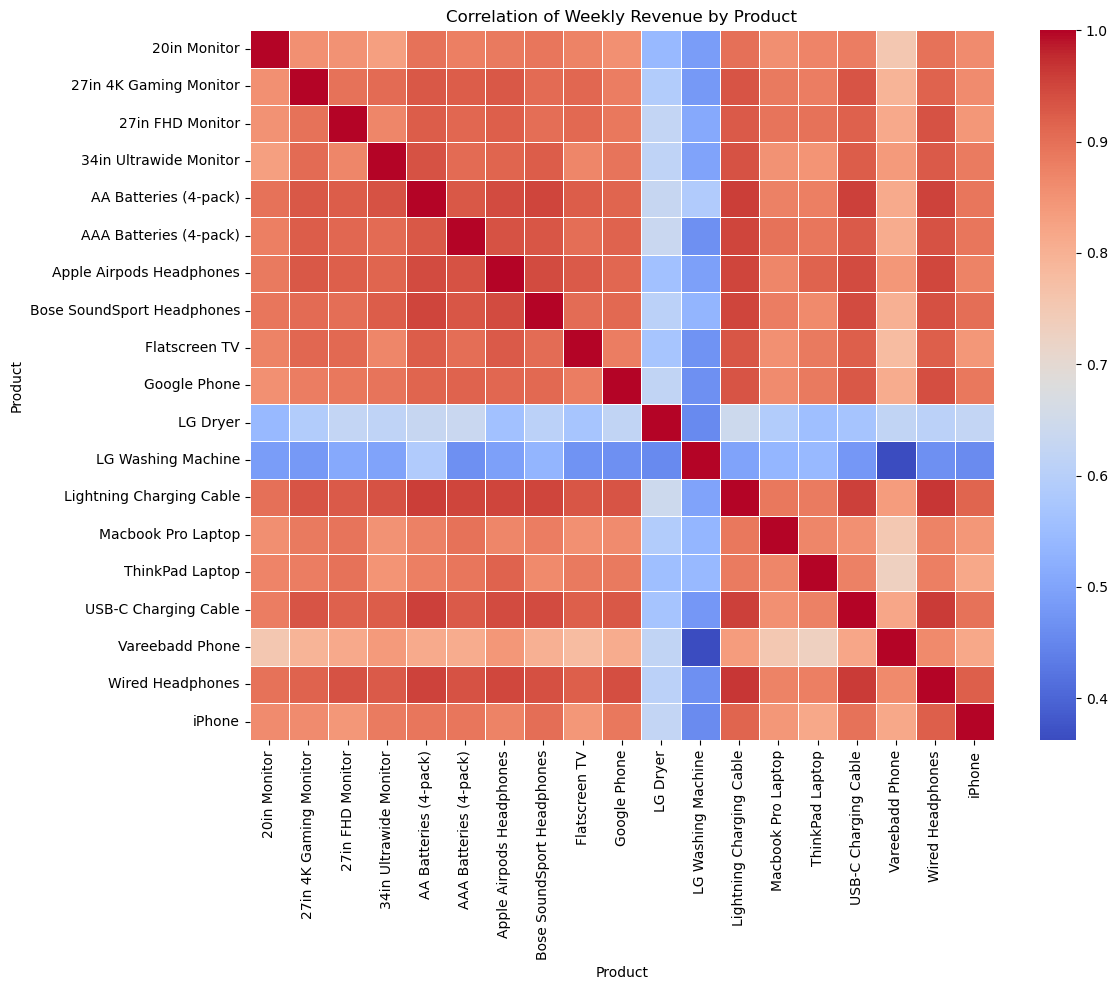

In [24]:
# 6.1. Pivot tables for revenue
monthly_pivot = df.pivot_table(
    index='Month', columns='Product', values='Revenue', aggfunc='sum'
)
weekly_pivot = df.pivot_table(
    index='Week', columns='Product', values='Revenue', aggfunc='sum'
)

# 6.2. Compute correlation matrices
corr_monthly = monthly_pivot.corr()
corr_weekly  = weekly_pivot.corr()

# 6.3. Display as tables
print("=== Monthly Revenue Correlation Matrix ===")
print(corr_monthly.round(2), "\n")

print("=== Weekly Revenue Correlation Matrix ===")
print(corr_weekly.round(2), "\n")

# 6.4. Visualize with heatmaps
plt.figure(figsize=(12,10))
sns.heatmap(corr_monthly, cmap='coolwarm', linewidths=0.5, annot=False)
plt.title('Correlation of Monthly Revenue by Product')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,10))
sns.heatmap(corr_weekly, cmap='coolwarm', linewidths=0.5, annot=False)
plt.title('Correlation of Weekly Revenue by Product')
plt.tight_layout()
plt.show()


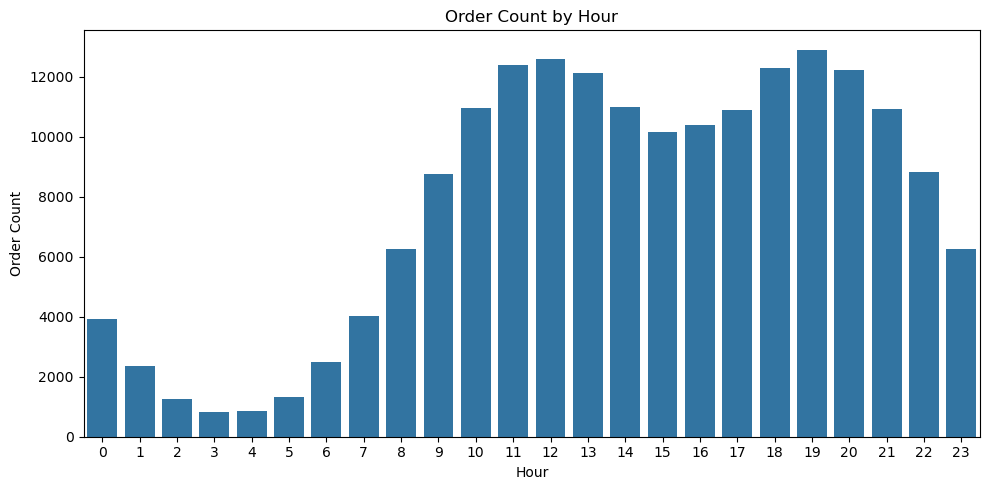

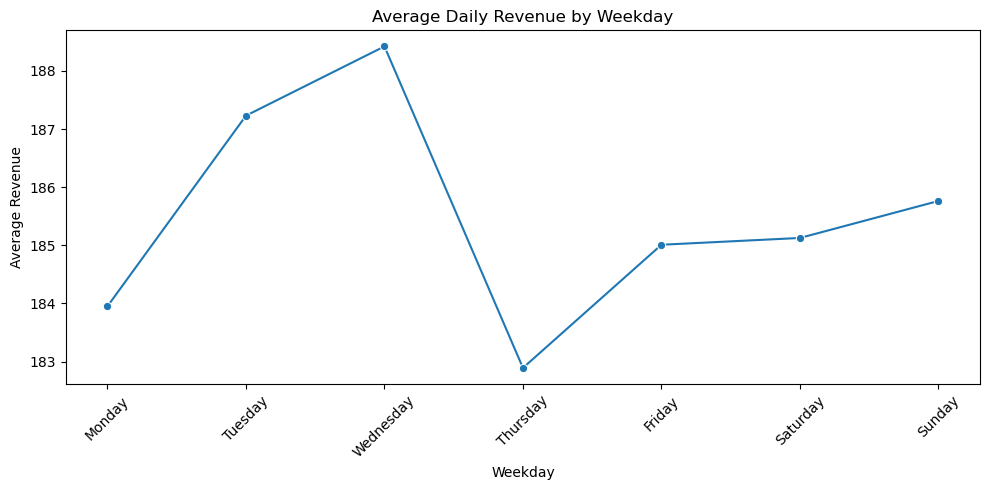

In [21]:
# 7. Additional Suggested Analyses

# Hourly Sales Patterns
hourly = df.groupby('Hour').size().reset_index(name='Order Count')
plt.figure(figsize=(10,5))
sns.barplot(x='Hour', y='Order Count', data=hourly)
plt.title('Order Count by Hour')
plt.xlabel('Hour')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()

# Weekday vs. Weekend
df['Weekday'] = df['Order Date'].dt.day_name()
daily = df.groupby('Weekday') \
          .agg({'Revenue':'mean'}) \
          .reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']) \
          .reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=daily, x='Weekday', y='Revenue', marker='o')
plt.title('Average Daily Revenue by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

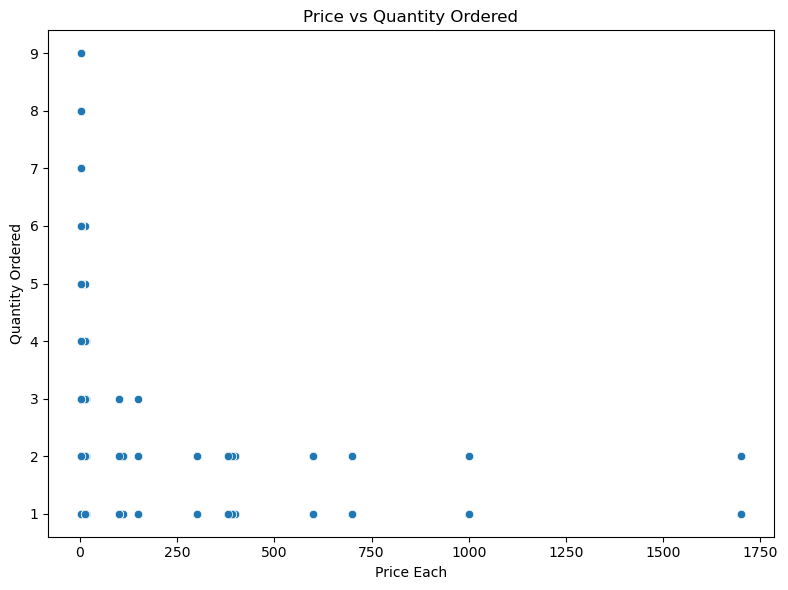

C:\Users\Siddharth Sumaria\AppData\Local\Temp\ipykernel_35680\879007989.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  city_rev = df.groupby('City').agg({'Revenue':'sum'}).sort_values('Revenue', ascending=False).head(10)


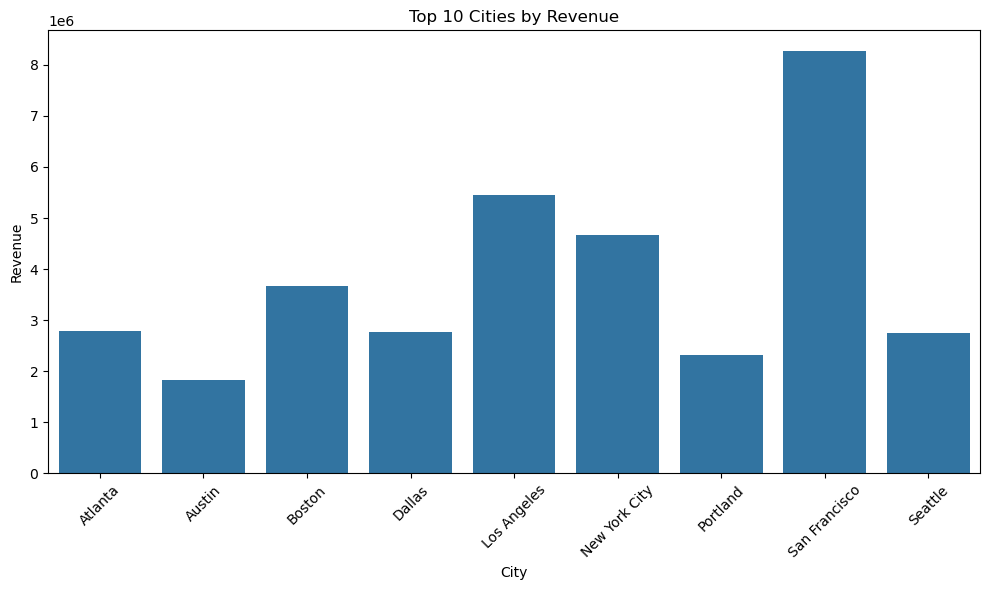

In [22]:
# Price vs. Quantity
plt.figure(figsize=(8,6))
sns.scatterplot(x='Price Each', y='Quantity Ordered', data=df)
plt.title('Price vs Quantity Ordered')
plt.xlabel('Price Each')
plt.ylabel('Quantity Ordered')
plt.tight_layout()
plt.show()

# Geographic Insights
city_rev = df.groupby('City').agg({'Revenue':'sum'}).sort_values('Revenue', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=city_rev.index, y=city_rev['Revenue'])
plt.title('Top 10 Cities by Revenue')
plt.xlabel('City')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

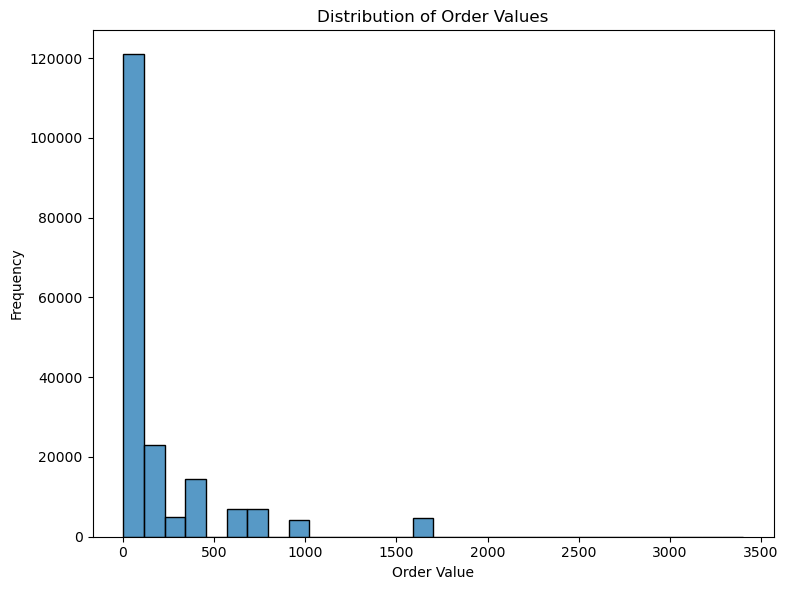

In [23]:
# Order Value Distribution
order_values = df['Quantity Ordered'] * df['Price Each']
plt.figure(figsize=(8,6))
sns.histplot(order_values, bins=30)
plt.title('Distribution of Order Values')
plt.xlabel('Order Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

=== Monthly Quantity by Product ===
Product  20in Monitor  27in 4K Gaming Monitor  27in FHD Monitor  \
Month                                                             
1                 218                     313               422   
2                 246                     427               475   
3                 326                     479               608   
4                 393                     566               736   
5                 341                     542               689   
6                 322                     451               567   
7                 327                     483               607   
8                 261                     440               491   
9                 277                     381               483   
10                429                     723               791   
11                420                     575               719   
12                569                     864               962   

Product  34in Ultrawide M

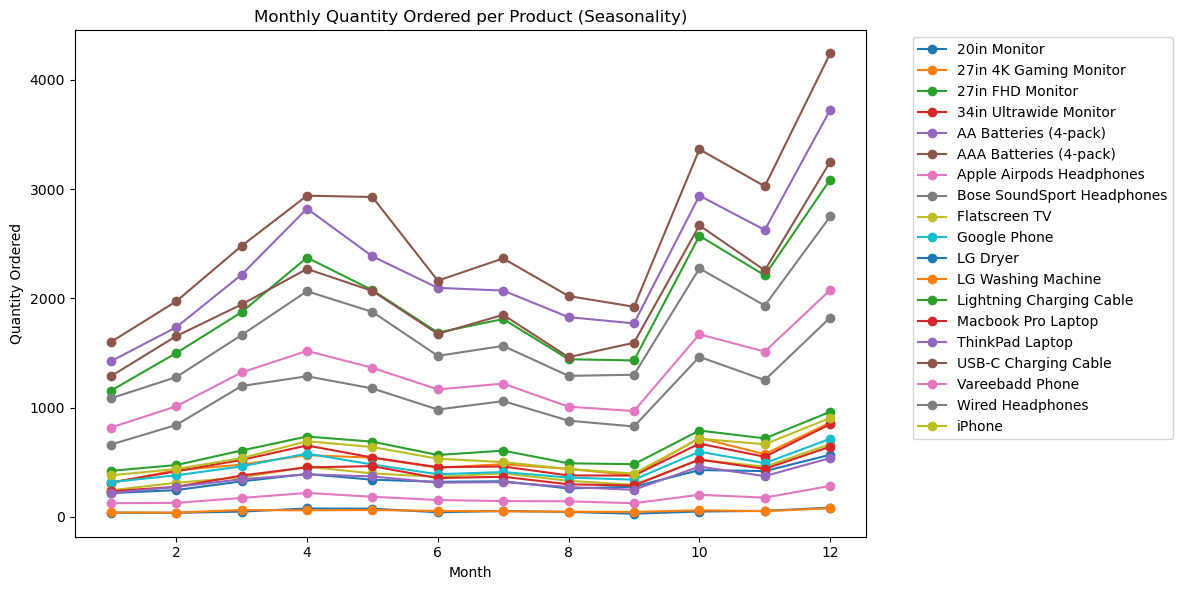

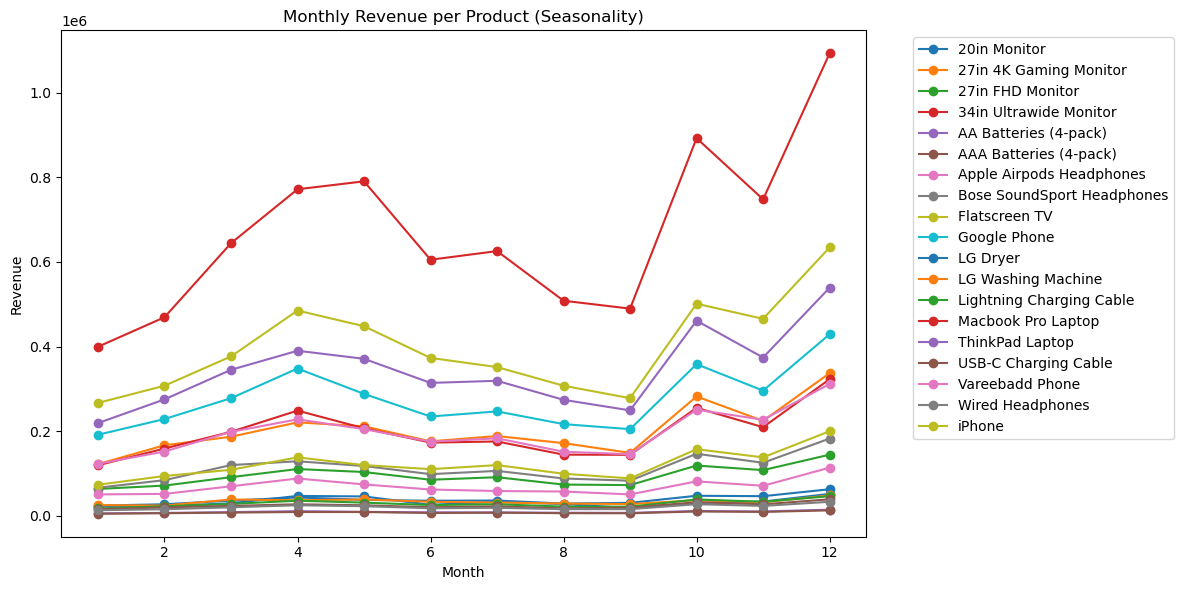

In [25]:
# Seasonality per product by month (annual seasonality)
# 1. Aggregate quantity and revenue by Product and Month
seasonality = df.groupby(['Product', 'Month']).agg({
    'Quantity Ordered': 'sum',
    'Revenue': 'sum'
}).reset_index()

# 2. Create pivot tables
seasonality_pivot_qty = seasonality.pivot(index='Month', columns='Product', values='Quantity Ordered')
seasonality_pivot_rev = seasonality.pivot(index='Month', columns='Product', values='Revenue')

# 3. Display tables
print("=== Monthly Quantity by Product ===")
print(seasonality_pivot_qty.round(0))
print("\n=== Monthly Revenue by Product ===")
print(seasonality_pivot_rev.round(2))

# 4. Visualize seasonality (line plots for each product)
plt.figure(figsize=(12,6))
for product in seasonality_pivot_qty.columns:
    plt.plot(seasonality_pivot_qty.index, 
             seasonality_pivot_qty[product], 
             marker='o', 
             label=product)
plt.title('Monthly Quantity Ordered per Product (Seasonality)')
plt.xlabel('Month')
plt.ylabel('Quantity Ordered')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
for product in seasonality_pivot_rev.columns:
    plt.plot(seasonality_pivot_rev.index, 
             seasonality_pivot_rev[product], 
             marker='o', 
             label=product)
plt.title('Monthly Revenue per Product (Seasonality)')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
